# TP 1 : Support Vector Machine (SVM)

Presented by: Enrique Gomez and Cristian Rodríguez

## Implementation
### 1. Classification of the class 1 vs class 2

In [67]:
from sklearn.svm import SVC, LinearSVC
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as linear

from sklearn.model_selection import train_test_split

# Load iris dataset

from sklearn import datasets

In [3]:
def printSVM(clf,X,y,fignum):
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')

    x_min = np.amin(X,0)[0]
    x_max = np.amax(X,0)[0]
    y_min = np.amin(X,0)[1]
    y_max = np.amax(X,0)[1]

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())

In [4]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[y != 0, :2]
y = y[y != 0]

X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.20, random_state=42)

In [5]:
clf_lin = SVC(kernel='linear')
clf_lin.fit(X_train, y_train)

y_train_lin = clf_lin.predict(X_train)
y_pred_lin = clf_lin.predict(X_test)

SVM Linear Train Errors:  23
SVM Linear Test Errors:  5


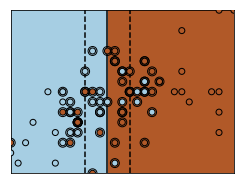

In [6]:
print("SVM Linear Train Errors: ", np.sum(np.abs(y_train_lin - y_train)))
print("SVM Linear Test Errors: ", np.sum(np.abs(y_pred_lin - y_test)))

fignum = 1
printSVM(clf_lin,X_train,y_train,fignum)
plt.show()

In [7]:
clf_linSVC = LinearSVC()
clf_linSVC.fit(X_train, y_train)

y_train_linSVC = clf_linSVC.predict(X_train)
y_pred_linSVC = clf_linSVC.predict(X_test)

print("Linear SVC Train Errors: ", np.sum(np.abs(y_train_linSVC - y_train)))
print("Linear SVC Test Errors: ", np.sum(np.abs(y_pred_linSVC - y_test)))

Linear SVC Train Errors:  22
Linear SVC Test Errors:  6


/Users/QQINO/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### 2. Comparison with polynomial kernel based SVM

Poly SVC with degree:  1
	Train Errors:  21
	Test Errors:  5
Poly SVC with degree:  2
	Train Errors:  23
	Test Errors:  6
Poly SVC with degree:  3
	Train Errors:  21
	Test Errors:  9
Poly SVC with degree:  4
	Train Errors:  23
	Test Errors:  9
Poly SVC with degree:  5
	Train Errors:  26
	Test Errors:  9


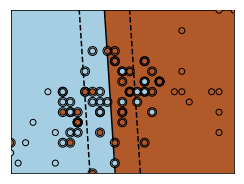

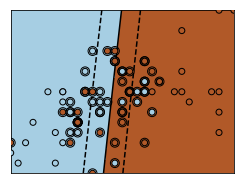

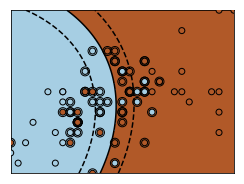

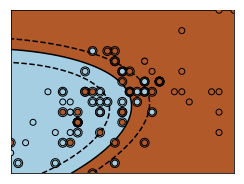

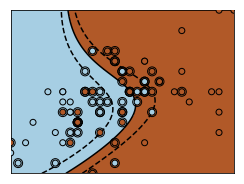

In [8]:
for i in np.arange(1,6,1):
    clf_pol = SVC(degree=i,kernel='poly',coef0=1,gamma='scale')
    clf_pol.fit(X_train, y_train)
    print("=======================")
    print("Poly SVC with degree: ", i)
    y_train_pol = clf_pol.predict(X_train)
    y_pred_pol = clf_pol.predict(X_test)
    print("\tTrain Errors: ", np.sum(np.abs(y_train_pol - y_train)))
    print("\tTest Errors: ", np.sum(np.abs(y_pred_pol - y_test)))
    fignum += 1
    printSVM(clf_pol,X_train,y_train,fignum)
plt.show()
    

### 3. Equivalent Problem
Given the problem: $\underset{\textbf{w} \in \mathbb{H},w_0\in \mathbb{R},\xi \in \mathbb{R}^{ n }}{\mathrm{argmin}}{ \frac { 1 }{ 2 } \left\| \textbf{w} \right\|^2  +C\sum _{ i=1 }^{ n }{ \xi _{ i } }  }$     ...... (1)

such that $\xi_i \ge 0, \forall i \in \{1,..,n\}$ and $\xi_i \ge 1-y_i(\left< \textbf{w},\Phi(\textbf{x}_i) \right>  + w_0), \forall i \in \{1,..,n\}$.

The problem (1) can be written as : 
$\underset{\textbf{w} \in \mathbb{H},w_0\in \mathbb{R}}{\mathrm{argmin}}{ \underset{\xi \in \mathbb{R}^{ n }}{\mathrm{argmin}}{ \frac { 1 }{ 2 } \left\| \textbf{w} \right\|^2 +C\sum _{ i=1 }^{ n }{ \xi _{ i } }  }  } $

The first part $\left\| \textbf{w} \right\|^2$ does not depend on $\xi$, so we can focus on solving this problem : 

$\underset{\xi \in \mathbb{R}^{ n }}{\mathrm{argmin}}{ C\sum _{ i=1 }^{ n }{ \xi _{ i } }  } $

According (1) each $\xi_i$ have to hold $\xi_i \ge 0$ and $\xi_i \ge 1-y_i(\left< \textbf{w},\Phi(\textbf{x}_i) \right>  + w_0)$. So, each $\xi _{ i }\ge \max { \left( 0,1-y_i(\left< \textbf{w},\Phi(\textbf{x}_i) \right>  + w_0) \right)  } $. As all $\xi_i$ and $\max { \left( 0,1-y_i(\left< \textbf{w},\Phi(\textbf{x}_i) \right>  + w_0) \right)  }$ are positive, this inequality holds:

$\sum _{ i=1 }^{ n }{ \xi _{ i } } \ge \sum _{ i=1 }^{ n }{ \max { \left( 0,1-y_i(\left< \textbf{w},\Phi(\textbf{x}_i) \right>  + w_0) \right)  }  }$

As each $\xi_i \in \mathbb{R}$, the minimum of each $\xi_i$ is reached in  $\max { \left( 0,1-y_i(\left< \textbf{w},\Phi(\textbf{x}_i) \right>  + w_0) \right)  }$. Therefore, $\underset{\xi \in \mathbb{R}^{ n }}{\mathrm{argmin}}{ C\sum _{ i=1 }^{ n }{ \xi _{ i } }  } = C\sum _{ i=1 }^{ n }{ \max { \left( 0,1-y_i(\left< \textbf{w},\Phi(\textbf{x}_i) \right>  + w_0) \right)  }  }$ 

And (1) is equivalent to :

$\underset{\textbf{w} \in \mathbb{H},w_0\in \mathbb{R}}{\mathrm{argmin}}{ \frac { 1 }{ 2 } \left\| \textbf{w} \right\|^2 +C\sum _{ i=1 }^{ n }{ \max { \left( 0,1-y_i(\left< \textbf{w},\Phi(\textbf{x}_i) \right>  + w_0) \right)  }  }  } $

$\Leftrightarrow \underset{\textbf{w} \in \mathbb{H},w_0\in \mathbb{R}}{\mathrm{argmin}}{ \frac { 1 }{ 2 } \left\| \textbf{w} \right\|^2 +C\sum _{ i=1 }^{ n }{ \left[ 1-y_i(\left< \textbf{w},\Phi(\textbf{x}_i) \right>  + w_0) \right]_+  }  } $      ...... (2)

### 4. Explanation of SVM

Explain the sentence : "An SVM minimizes the classification error by using a convex majorant of the function which is 1 when the margin is negative and 0 otherwise."

What SVM makes is to add a margin to the separator hyperplane , as follows:

![alt text](SVM.png "SVM")

Then, when the points are on one side of this margin, they are classified into one class and when they are at the other side they are classified into the other one. This is done by minimizing the classification error over the next function:

$\frac { 1 }{ 2 } \left\| \textbf{w} \right\|^2 +C\sum _{ i=1 }^{ n }{ \left[ 1-y_i(\left< \textbf{w},\Phi(\textbf{x}_i) \right>  + w_0) \right]_+}$

This function is convex as it is the sum of two convex functions. The $L_2$-norm is convex and the hinge function is convex too ( It is the maximum of two convex function, a linear and a constant function)

The Hinge function applied to SVM $C\sum _{ i=1 }^{ n }{ \left[ 1-y_i(\left< \textbf{w},\Phi(\textbf{x}_i) \right>  + w_0) \right]_+}$ will determine the hyperplane to split up the data. The function $\frac { 1 }{ 2 } \left\| \textbf{w} \right\|^2$ will determine the inverse of the length of the margin.

In the optimization problem, we want to minimize the marge, which is equivalent to choose the two points closest to each other. Then we want to minimize $C\sum _{ i=1 }^{ n }{ \left[ 1-y_i(\left< \textbf{w},\Phi(\textbf{x}_i) \right>  + w_0) \right]_+}$. This is done only if $\left[ 1-y_i(\left< \textbf{w},\Phi(\textbf{x}_i) \right>  + w_0) \right]_+$ is zero. This happens only if $y_i$ and $\left< \textbf{w},\Phi(\textbf{x}_i) \right>  + w_0$ have the same sign and the norm of this value is less than 1. Otherwise, the function is increasing.

Then, the margins are at $(\left< \textbf{w},\Phi(\textbf{x}_i) \right>  + w_0) = 1$ and $(\left< \textbf{w},\Phi(\textbf{x}_i) \right>  + w_0) = -1$. This margin should be at least 1 to make the Hinge function zero. When the margin is less than 1 (negative), the Hinge value is positive.



-------------------------------------------------------------------------------------------------------------------------

## SVM GUI


#### Script testing

#### Unbalanced data set experiment

#### Effect of a decreasing in the parameter C with a linear kernel


------------------------------------------------------------------------------------------------------------------------

## Classification of faces

### 5) Influence of the regularization parameter

#### Definition of libraries and functions

In [9]:
# Libraries

from time import time
import pylab as pl
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people


# Data loading
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4,
                              color=True, funneled=False, slice_=None,
                              download_if_missing=True)

# Introspect the images arrays to find the shapes (for plotting)
images = lfw_people.images / 255.
n_samples, h, w, n_colors = images.shape

# the label to predict is the id of the person
target_names = lfw_people.target_names.tolist()

# Pair to classify 
names = ['Tony Blair', 'Colin Powell']
#names = ['Donald Rumsfeld', 'Colin Powell']

# Labels
idx0 = (lfw_people.target == target_names.index(names[0]))
idx1 = (lfw_people.target == target_names.index(names[1]))

# Charge images of selected people
images = np.r_[images[idx0], images[idx1]]
n_samples = images.shape[0]
y = np.r_[np.zeros(np.sum(idx0)), np.ones(np.sum(idx1))].astype(np.int)

# Extract features

# features using only illuminations
X = (np.mean(images, axis=3)).reshape(n_samples, -1)

# # or compute features using colors (3 times more features)
# X = images.copy().reshape(n_samples, -1)

# Scale features
X -= np.mean(X, axis=0)
X /= np.std(X, axis=0)


# Split data into a half training and half test set

indices = np.random.permutation(X.shape[0])
train_idx, test_idx = indices[:X.shape[0] //2], indices[X.shape[0] // 2:]# With // it returns integrer
X_train, X_test = X[train_idx, :], X[test_idx, :]
y_train, y_test = y[train_idx], y[test_idx]
images_train, images_test = images[
    train_idx, :, :, :], images[test_idx, :, :, :]





#### Influence of C parameter

In [10]:
# Quantitative evaluation of the model quality on the test set

# Fit a classifier,
ind =np.logspace(-5,5, num=100)
Results=np.zeros(ind.size)
j=0
for i in ind:
    clf = LinearSVC(C=i, class_weight=None)
    clf.fit(X_train, y_train)
    Results[j]=1-clf.score(X_test, y_test)
    j=j+1

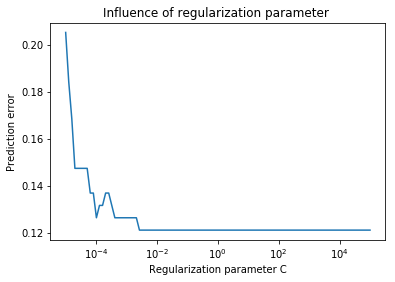

In [11]:
plt.semilogx(ind,Results)
plt.ylabel('Prediction error')
plt.xlabel('Regularization parameter C')
plt.title('Influence of regularization parameter ')
plt.show()

### 6) Addition of nuisance variables 


In [26]:
# Quantitative evaluation of the model quality on the test set
ntrain=X.shape[0]
Results=np.zeros(10)

for j in range(0,10):    
    Xaux=np.copy(X)
    for i in range(0,10):
        Xtemp=np.copy(Xaux)
        Xaux = np.zeros((ntrain,Xtemp[1].size+1000))
        Xaux[:,:-1000] = Xtemp
        Xaux[:,Xaux[1].size-1001:Xaux[1].size-1]=10*np.random.rand(ntrain,1000)
        X_train, X_test, y_train, y_test = train_test_split(Xaux, np.ravel(y), test_size=0.5, random_state=42)
        clf = LinearSVC(C=1, class_weight=None)
        clf.fit(X_train, y_train)
        Results[i]=Results[i]+1-clf.score(X_test, y_test)

Results=Results/10

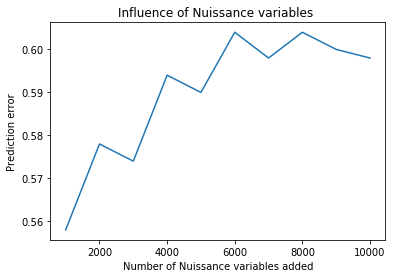

In [27]:
ind = np.linspace(1000, 10000, num=10)
plt.plot(ind,Results)
plt.ylabel('Prediction error')
plt.xlabel('Number of Nuissance variables added')
plt.title('Influence of Nuissance variables ')
plt.show()

### 7) Why the features are centered and reduced?


### 8) Non-linear RBF kernel on prediction

#### Influence of the kernel's degree

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y), test_size=0.5, random_state=42)
Results=np.zeros(10)

for i in range(0,10):
    clf = SVC(C=1.0, kernel='rbf', degree=i+1, gamma='auto')
    clf.fit(X_train, y_train)
    Results[i]=1-clf.score(X_test, y_test)
    


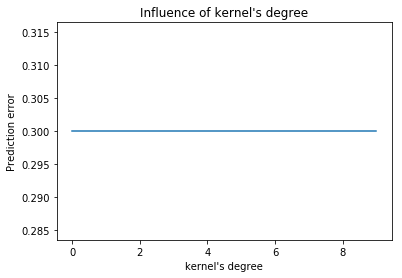

10

In [29]:
plt.plot(Results)
plt.ylabel('Prediction error')
plt.xlabel("kernel's degree")
plt.title("Influence of kernel's degree")
plt.show()
Results.size

#### Influence of the regularitation parameter

In [30]:
# Fit a classifier,
ind =np.logspace(-5,5, num=50)
Results=np.zeros(ind.size)
j=0
for i in ind:
    clf = SVC(C=i, kernel='rbf', degree=3, gamma='auto')
    clf.fit(X_train, y_train)
    Results[j]=1-clf.score(X_test, y_test)
    j=j+1

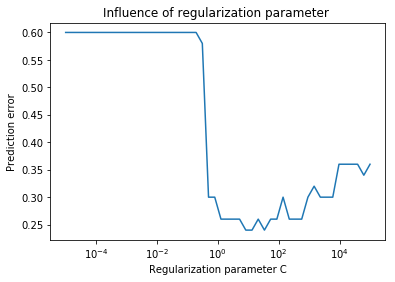

50

In [31]:
plt.semilogx(ind,Results)
plt.ylabel('Prediction error')
plt.xlabel('Regularization parameter C')
plt.title('Influence of regularization parameter ')
plt.show()
Results.size

#### Reduction of dimension based on PCA

In [32]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=1,svd_solver ='randomized') # use number of components take explain 99.9% of variability
pca.fit(X)
XpPCA = pca.transform(X)  
X_train, X_test, y_train, y_test = train_test_split(XpPCA, np.ravel(y), test_size=0.5, random_state=42)

# Fit a classifier,
ind =np.logspace(-5,5, num=50)
Results=np.zeros(ind.size)
j=0
for i in ind:
    clf = SVC(C=i, kernel='rbf', degree=3, gamma='auto')
    clf.fit(X_train, y_train)
    Results[j]=1-clf.score(X_test, y_test)
    j=j+1

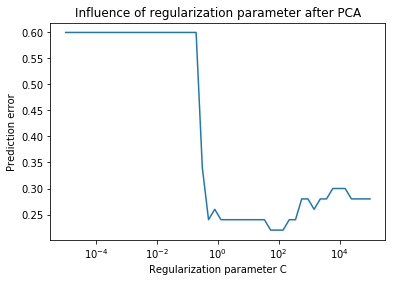

In [33]:
plt.semilogx(ind,Results)
plt.ylabel('Prediction error')
plt.xlabel('Regularization parameter C')
plt.title('Influence of regularization parameter after PCA')
plt.show()

### 9. Dual Problem

In [129]:
y = np.r_[np.zeros(np.sum(idx0)), np.ones(np.sum(idx1))].astype(np.int)
X = (np.mean(images, axis=3)).reshape(n_samples, -1)
X -= np.mean(X, axis=0)
X /= np.std(X, axis=0)

X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.20, random_state=42)
c=0.0001
clf_lin = SVC(kernel='linear', random_state = 42, C=c)
clf_lin.fit(X_train, y_train)

w=clf_lin.coef_
w0=clf_lin.intercept_
a3=clf_lin.support_vectors_
a=clf_lin.dual_coef_

print("Score: ", clf_lin.score(X_train,y_train))

def primalFunction(w,w0,X,Y,C=1):
    n = np.size(Y)
    N = (linear.norm(w))**2/2
    H = 0
    for i in range(n):
        H = H + max(0,1-Y[i]*(np.dot(w,X[i,:])+w0))
    return N + C*H

print(primalFunction(w,w0,X_train,y_train,c)[0])

def dualFunction(a,X,Y):
    Y = Y[clf_lin.support_]
    X = X[clf_lin.support_,:]
    n = np.size(Y)
    dual = 0
    a = np.ravel(a)
    for i in range(n):
        for j in range(n):
            dual += Y[i]*Y[j]*a[i]*a[j]*np.dot(X[i,:],X[j,:])
    return dual/2

print(dualFunction(a,X_train,y_train))

print("Difference between the solutions to the primal and dual "+
      "objective functions: ",primalFunction(w,w0,X_train,y_train,c)[0]
                              -dualFunction(a,X_train,y_train))

Score:  0.9572368421052632
0.017698772008749475
0.0033973348386538583
Difference between the solutions to the primal and dual objective functions:  0.014301437170095617


### 10. Optimization Tolerance


In [ ]:
# Fit a classifier,
ind =np.logspace(-8,2, num=50)
diff = []
for i in ind:
    clf_lin = SVC(kernel='linear', random_state = 42, C=c,tol=i)
    clf_lin.fit(X_train, y_train)
    w=clf_lin.coef_
    w0=clf_lin.intercept_
    a=clf_lin.dual_coef_
    diff.append(primalFunction(w,w0,X_train,y_train,c)[0]-dualFunction(a,X_train,y_train))

In [ ]:
plt.semilogx(ind,diff)
plt.ylabel('Difference between Primal and Dual solution')
plt.xlabel('Optimization Tolerance')
plt.title('Influence of the optimization tolerance parameter')
plt.show()